# Exercises and Homework for week 3

**Your group number here please:**  Group 02  
Ajay, Areti & Vlera

# 1. Lecture Review (0 points)

N/A

# 2. Numerical Integration (15 points)

We want to numerically estimate the integrals
$$
\int_0^{\pi}\sin(x)\,{\rm d}x = 2 \text{   and   } \int_{-1}^2 x^3\,{\rm d}x=\frac{15}{4}.
$$

We will do the estimation in the easiest possible way with Riemann sums: Be $f(x)$ a continuous function on the interval $I=[a;b]$. Be $x_i$ with $a < x_0 < \dots < x_n < b$ a partition of the interval $I$. With $\Delta x_i=x_{i+1}-x_i; i\in[0,n-1]$ and $f_{\Delta_i}=f\left(\frac{x_i+x_{i+1}}2\right)$, the integral can be approximated with
$$\int_a^bf(x)\,{\rm d}x\approx \sum_{i=0}^{n-1}\Delta x_i\cdot f_{\Delta_i}=I_{\rm approx}(n).$$ See the following figure for a visualisation of the method. You can read more on Riemann sums on [Wikipedia](https://en.wikipedia.org/wiki/Riemann_sum). 

<img src="figs/sin_cubic.png" style="width: 500px;" style="height: 250px;">



1. Implement the Riemann integration; Given numpy arrays with $x_i$ and corresponding function values, the calculations of $\Delta x_i$, $f_{\Delta_i}$ and the Riemann sum can be done with a single numpy-expression each.
2. Obviously, the accuracy of our numerical estimates depend on the partition of the interval $I=[a;b]$ and particularly on our choice of $n$. One can show that the absolute error $\epsilon_{\rm abs}(n)$ of the integral approximation with Riemann sums behaves like:
$$
\epsilon_{\rm abs}(n)=\left|I_{\rm approx}(n)-\int_a^bf(x)\,{\rm d}x\right| \propto n^{\alpha}.
$$
Perform some experiments to estimate $\alpha$. **Remark:** The task is deliberately vaguely formulated. To come up with a reasonable test is part of the exercise.
3. Modify your program from subtask 1 to estimate the indefinite integral
$$F(x)=\int_0^x \sin(y)\,{\rm d}y$$
in the interval $x\in[0;2\pi]$ and plot $F(x)$. Is the result what
you are expecting?
  **Hint for subtask (3):** Have a look at the function `numpy.cumsum`.

In [16]:
import numpy as np
import matplotlib.pyplot as plt

def riemann(f,a,b,n):
    """Takes in a function f, an interval [a, b] and a partition of the interval n and gives out Riemann sum. 
    The function f has to return a numerical value."""
    dx = (b-a)/n #to determine the distance between the array elements in the array x
    x = np.arange(a,b+dx,dx) #create integration range; check remarks for why b+dx has been used
    s = 0 #initialise riemann sum
    for i in range(0,n): #calculate riemann sum by running over subintervals
        y = (x[i+1] + x[i])/2.0 #determine the mid-point of the subinterval
        s += f(y)*(x[i+1] - x[i]) #sum the contribution to the riemann sum from the subinterval
    return(s)

def riemanncsum(f,a,b,n):
    """Takes in a function f, an interval [a, b] and a partition of the interval n and gives out cumulative Riemann sums along the subintervals. 
    The function f has to return a numerical value."""
    dx = (b-a)/n #to determine the distance between the array elements in the array x
    x = np.arange(a,b+dx,dx) #create integration range; check remarks for why b+dx has been used
    s = np.zeros(n) #initialise array for riemann sum contributions from subintervals
    for i in range(0,n): #calculate riemann sum by running over subintervals
        y = (x[i+1] + x[i])/2.0 #determine the mid-point of the subinterval
        s[i] = f(y)*(x[i+1] - x[i]) #add (to an array) the contribution to the riemann sum from the subinterval
        cs = np.cumsum(s) #calculate the cumulative sum
    return(cs)

In [3]:
#problem 2.1
def x3(x):
    """Returns cube"""
    return(x**3)

#printing the riemann sums for sinx and x**3
print("I[sin(x)]:[0,pi] = ",riemann(np.sin, 0, np.pi, 100))
print("I[x^3]:[-1,2] = ",riemann(x3, -1, 2, 100))

I[sin(x)]:[0,pi] =  2.0000822490709855
I[x^3]:[-1,2] =  3.7496625000000217


In [4]:
#problem 2.2
n = 1000 #number of partitions

#use the exact values for the definite integrals while calculating the errors
#calculate absolute errors
eps1 = np.abs((riemann(np.sin, 0, np.pi, n)-2))
eps2 = np.abs((riemann(x3, -1, 2, n)-(15/4)))
#estimate alpha; eps1 = n^alpha => alpha = log_n(eps1) = log(eps1)/log(n) [change of base rule]
alpha1 = np.log(eps1)/np.log(n)
alpha2 = np.log(eps2)/np.log(n)
#print results
print("Absolute error in sin integral = ", eps1)
print("Absolute error in x^3 integral = ", eps2)
print("alpha value for sin integral = ", alpha1)
print("alpha value for x^3 integral = ", alpha2)
print("alpha is approximately -2")

Absolute error in sin integral =  8.224672702894509e-07
Absolute error in x^3 integral =  3.3749999799326247e-06
alpha value for sin integral =  -2.0282937918617643
alpha value for x^3 integral =  -1.8239087418050743
alpha is approximately -2


We estimate the value of alpha to be -2. This tells us that $\epsilon_{abs}(n) \sim \frac{1}{n^2}$.

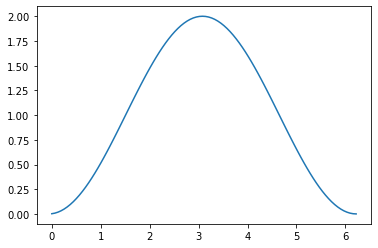

In [29]:
#problem 3.3
n = 100 #number of partitions
x = np.arange(0, 2*np.pi, 2*np.pi/n) #interval
y = riemanncsum(np.sin, 0, 2*np.pi, n) #get cumulative sum
#plotting
plt.plot(x,y)

This is the expected result. The integral, $\int_0^x sin(y) dy$ gives $-cos(x)+cos(0) = 1 - cos(x)$. This is the value of the indefinite integral, $\int sin(x) dx$ up to an additional constant $c$. That is, $\int sin(x) dx = -cos(x) + c$.  
We confirm this result by plotting below $1 - \int_0^x sin(y) dy$ and $cos(x)$. We have set $n = 100$ to show the two curves distinctly. This gives us a plot with the curves matching within reasonable errors that arise due to numerical evaluation of the integral. If we set $n = 1000$, the curves overlap completely and it is not possible to differentiate between the two curves at this scale.

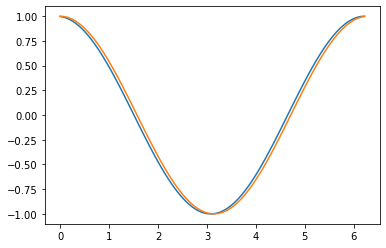

In [30]:
#if you get an error, execute the previous cell first!
y = 1 - y #cos(x) = 1 - integral (see above)
#plotting
plt.plot(x,y)
plt.plot(x,np.cos(x))

#REMARKS  
We slightly modified the given Riemann sum algorithm to ensure that we don't omit any of the intervals. According to the algorithm, $\Delta x_i=x_{i+1}-x_i; i\in[0,n-1]$ and $a < x_0 < \dots < x_n < b$. This omits the intervals $(a, x_0)$ and $(x_n, b)$. Neglecting the contributions from the end subintervals results in a mismatch between the actual and estimated value of the integral whenever the number of partition is taken to be small (see below). Of course, this error due to excluding end subintervals goes to zero as we increase the number of partitions. But the rate at which this error goes to zero depends on the rate at which the function changes at the end subintervals. More technically, greater the value of the derivative at the endpoint, greater the contribution that we will be missing out. This can be seen from the difference in the mismatches for $sin(x)$ and $x^3$ integrals. Therefore, we decided to include the end subintervals.

In [63]:
#the following codes are taken from the previous cells
#not a lot of comments are added for that reason

#define integral range and number of partitions; change the value of n to see how it affects the result
b=2
a=-1
n=10
dx = (b-a)/n
#we are excluding the right end subinterval here
#note that the left end subinterval is still included
x = np.arange(a,b,dx)
s = 0
for i in range(0,n-1):
    y = (x[i+1] + x[i])/2.0
    s += y**3 * (x[i+1] - x[i])

print("Value of the x^3 integral (No. of partitions:",n,")= ", s)
#using the exact value of the integral for the range -1,2
#if a, b are modified, this (15/4) value has to be modified too
print("Mismatch = ", s-15/4)

Value of the x^3 integral (No. of partitions: 10 )=  1.8167625000000007
Mismatch =  -1.9332374999999993


## 3. Barplots (10 points)
Reproduce the Riemann Sums plots of Task 2 with `numpy` and `matplotlib`.

**Hints:** (1) Please have a  look at the function `matplotlib.pyplot.bar`; (2) You *do not* need to reproduce the exact colors, linewidths or label sizes of the plots.

### Your solution here please

## 4. Strings (0 points)
Besides `numpy`-arrays, the second important Python-container to learn are strings. You probably already used them in your programs to print status messages or results. Strings are *homogeneous* containers of characters. I do not want to explicitely treat strings in lecture and I therefore ask you to watch the [video lecture on strings](https://youtu.be/OsQ28kHjLj0 ) and to do [string review questions](../video_lecture_01_strings/02_Strings_Review.ipynb) as part of this weeks homework tasks. The lecture notebook for strings is [here](../video_lecture_01_strings/01_Strings.ipynb).  

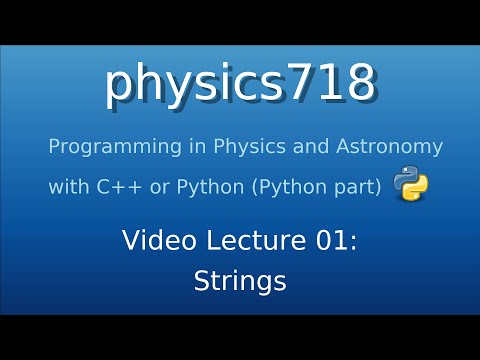

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo('OsQ28kHjLj0')